In [4]:
pip install tweepy
pip install pandas-profiling
pip install wordcloud
pip install python-twitter

Note: you may need to restart the kernel to use updated packages.


In [249]:
import collections
import itertools
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re
import sys
import csv
import tweepy
import matplotlib.pyplot as plt
import pandas_profiling
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [250]:
consumer_key='DWrevvbdWulh6epim93LggsNf'
consumer_secret='GXJf52EczvZX33UjSP5wP8ED2P8XlOtCczNAEwgF4jFDqGgEjz'
access_token='80817887-fbT7RQgMUqnRkLbGU7WLjjLLpDHpIHf9KGho0Tn1E'
access_token_secret='6qBfrwxpdyFmkbESTxkh9D22uIVsNOAil6qEl7tsjEnTI'

In [251]:
auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api=tweepy.API(auth, wait_on_rate_limit=True)

In [295]:
search='worldcup2019+nzvseng+engvsnz -filter:retweets'
tweets=tweepy.Cursor(api.search,search,lang='en', tweet_mode='extended').items(1000)
tweet_data=[tweet.full_text for tweet in tweets]   

In [253]:
tweet_data

[".@akshaykumar's family is unique when it comes to love for Cricket! Deets inside\n\n#AkshayKumar #WorldCup2019Final #WorldCup2019 #ENGvsNZ #ENGvNZ #England #NZvENG #NewZealand #NZvsENG #Koimoi \n\nhttps://t.co/rPbId5cgC8",
 'I think I can easily beat that #josiyar in my #jinxing twitter world. This above tweet was  on 25th june way before the semis. #england #worldcup2019 #nz #NZvsEng #EngvsNZ',
 'Transform ur Life like how England\ntransform there One day Cricket After 2015 world cup heartbreak!!\n\n#MondayMotivaton\n#BenStokes #NZvsENG\n#CWC19 #ENGvsNZ #WorldCup2019Final #WorldCup2019',
 'Easy to criticize #ICCRules now but every country that played WC signed up to same before entering the tournament. Everyone was aware of the same at the time. #WorldCupfinal #WorldCup2019 #WorldCup2019Final #WorldCup #NZvsENG #ENGvsNZ',
 'Review of #cwc19final by #thebrandamitdatta 🕺🏃\u200d♂️ #CWC2019 #WorldCup2019 #cwc19 #iccworldcup2019 #engvsnz #nzvseng #england🇬🇧 #englandcricketfans #newzealan

Making a function to remove all URLs in the tweets

In [284]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [285]:
all_tweets_no_url=[remove_url(t) for t in tweet_data]

In [286]:
all_tweets_no_url

['akshaykumars family is unique when it comes to love for Cricket Deets insideAkshayKumar WorldCup2019Final WorldCup2019 ENGvsNZ ENGvNZ England NZvENG NewZealand NZvsENG Koimoi',
 'I think I can easily beat that josiyar in my jinxing twitter world This above tweet was on 25th june way before the semis england worldcup2019 nz NZvsEng EngvsNZ',
 'Transform ur Life like how Englandtransform there One day Cricket After 2015 world cup heartbreakMondayMotivatonBenStokes NZvsENGCWC19 ENGvsNZ WorldCup2019Final WorldCup2019',
 'Easy to criticize ICCRules now but every country that played WC signed up to same before entering the tournament Everyone was aware of the same at the time WorldCupfinal WorldCup2019 WorldCup2019Final WorldCup NZvsENG ENGvsNZ',
 'Review of cwc19final by thebrandamitdatta CWC2019 WorldCup2019 cwc19 iccworldcup2019 engvsnz nzvseng england englandcricketfans newzealandcricket mondaymotivation travelblogger',
 'Williamson must be saying Hindi accent Ben Stokes English ENGvsN

#### Now splitting each word and converting it into lowercase

In [287]:
lower_case_words = [tweet.lower().split() for tweet in all_tweets_no_url]
lower_case_words

[['akshaykumars',
  'family',
  'is',
  'unique',
  'when',
  'it',
  'comes',
  'to',
  'love',
  'for',
  'cricket',
  'deets',
  'insideakshaykumar',
  'worldcup2019final',
  'worldcup2019',
  'engvsnz',
  'engvnz',
  'england',
  'nzveng',
  'newzealand',
  'nzvseng',
  'koimoi'],
 ['i',
  'think',
  'i',
  'can',
  'easily',
  'beat',
  'that',
  'josiyar',
  'in',
  'my',
  'jinxing',
  'twitter',
  'world',
  'this',
  'above',
  'tweet',
  'was',
  'on',
  '25th',
  'june',
  'way',
  'before',
  'the',
  'semis',
  'england',
  'worldcup2019',
  'nz',
  'nzvseng',
  'engvsnz'],
 ['transform',
  'ur',
  'life',
  'like',
  'how',
  'englandtransform',
  'there',
  'one',
  'day',
  'cricket',
  'after',
  '2015',
  'world',
  'cup',
  'heartbreakmondaymotivatonbenstokes',
  'nzvsengcwc19',
  'engvsnz',
  'worldcup2019final',
  'worldcup2019'],
 ['easy',
  'to',
  'criticize',
  'iccrules',
  'now',
  'but',
  'every',
  'country',
  'that',
  'played',
  'wc',
  'signed',
  'up

### Removing Stopwords from NLTK

In [288]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Lohit
[nltk_data]     Pant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [289]:
stop_words=set(stopwords.words('english'))
list(stop_words)[:10]

['don', 'me', "it's", 'am', 'ours', 'himself', 'i', 'hadn', 'our', 'he']

In [290]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in lower_case_words]
tweets_nsw

[['akshaykumars',
  'family',
  'unique',
  'comes',
  'love',
  'cricket',
  'deets',
  'insideakshaykumar',
  'worldcup2019final',
  'worldcup2019',
  'engvsnz',
  'engvnz',
  'england',
  'nzveng',
  'newzealand',
  'nzvseng',
  'koimoi'],
 ['think',
  'easily',
  'beat',
  'josiyar',
  'jinxing',
  'twitter',
  'world',
  'tweet',
  '25th',
  'june',
  'way',
  'semis',
  'england',
  'worldcup2019',
  'nz',
  'nzvseng',
  'engvsnz'],
 ['transform',
  'ur',
  'life',
  'like',
  'englandtransform',
  'one',
  'day',
  'cricket',
  '2015',
  'world',
  'cup',
  'heartbreakmondaymotivatonbenstokes',
  'nzvsengcwc19',
  'engvsnz',
  'worldcup2019final',
  'worldcup2019'],
 ['easy',
  'criticize',
  'iccrules',
  'every',
  'country',
  'played',
  'wc',
  'signed',
  'entering',
  'tournament',
  'everyone',
  'aware',
  'time',
  'worldcupfinal',
  'worldcup2019',
  'worldcup2019final',
  'worldcup',
  'nzvseng',
  'engvsnz'],
 ['review',
  'cwc19final',
  'thebrandamitdatta',
  'cwc

### Removing the words we searched for

In [291]:
remove_words=('worldcup2019', 'nzvseng','engvsnz', 'worldcup','engvnz' )
all_list_tweets=[[w for w in word if not w in remove_words] for word in tweets_nsw]
all_list_tweets=list(itertools.chain(*all_list_tweets))
all_list_tweets

['akshaykumars',
 'family',
 'unique',
 'comes',
 'love',
 'cricket',
 'deets',
 'insideakshaykumar',
 'worldcup2019final',
 'england',
 'nzveng',
 'newzealand',
 'koimoi',
 'think',
 'easily',
 'beat',
 'josiyar',
 'jinxing',
 'twitter',
 'world',
 'tweet',
 '25th',
 'june',
 'way',
 'semis',
 'england',
 'nz',
 'transform',
 'ur',
 'life',
 'like',
 'englandtransform',
 'one',
 'day',
 'cricket',
 '2015',
 'world',
 'cup',
 'heartbreakmondaymotivatonbenstokes',
 'nzvsengcwc19',
 'worldcup2019final',
 'easy',
 'criticize',
 'iccrules',
 'every',
 'country',
 'played',
 'wc',
 'signed',
 'entering',
 'tournament',
 'everyone',
 'aware',
 'time',
 'worldcupfinal',
 'worldcup2019final',
 'review',
 'cwc19final',
 'thebrandamitdatta',
 'cwc2019',
 'cwc19',
 'iccworldcup2019',
 'england',
 'englandcricketfans',
 'newzealandcricket',
 'mondaymotivation',
 'travelblogger',
 'williamson',
 'must',
 'saying',
 'hindi',
 'accent',
 'ben',
 'stokes',
 'english',
 'cricket',
 'superover',
 'benst

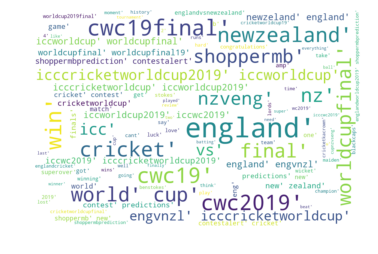

In [312]:
wordcloud=WordCloud(max_font_size=100, max_words=100, background_color='white', width=1200, height=800).generate(str(all_list_tweets))
fig,ax=plt.subplots()
plt.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()

In [293]:
collection_tweets=collections.Counter(all_list_tweets)
top_ten=collection_tweets.most_common(10)
top_ten

[('england', 71),
 ('worldcupfinal', 46),
 ('cricket', 39),
 ('world', 31),
 ('cwc19final', 28),
 ('win', 28),
 ('cwc2019', 27),
 ('cwc19', 27),
 ('shoppermb', 27),
 ('cup', 26)]

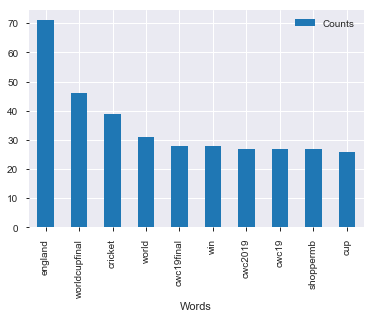

In [294]:
df_tweets=pd.DataFrame(data=top_ten, columns=['Words', 'Counts'])
df_tweets.plot.bar(x='Words', y='Counts')